# Polynomial Regression

We define the target function to be the cubic function $ax^3 + bx^2 + cx + d$ with parameters $a = -1, b= 2, c = -3, d= 4$, and added gaussian noise with standard deviation $\sigma = 0.1$.

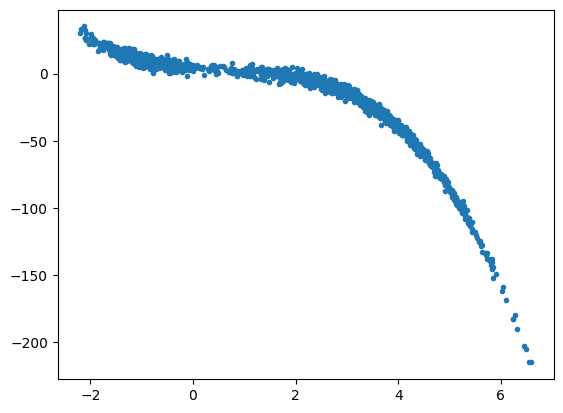

In [34]:
import numpy as np
import matplotlib.pyplot as plt

n_samples = 512
seed = 69


x11 = np.random.normal(loc=-1, scale=0.5, size=n_samples)
x12 = np.random.normal(loc=2.5, scale=1, size=n_samples)
x13 = np.random.normal(loc=4, scale=1, size=n_samples)

x21 = np.random.exponential(scale=3, size=n_samples)
x22 = np.random.lognormal(mean=0.5, sigma=0.5, size=n_samples)
x23 = np.random.poisson(lam=2, size=n_samples) + 5


x0 = np.ones(3 * n_samples)
X = np.stack(
    (
        x0,
        np.concatenate((x11, x12, x13)),
        np.concatenate((x21, x22, x23)),
    ),
    axis=1,
)

x1 = np.concatenate((x11, x12, x13))
x_reg = np.stack((x0, x1, x1**2, x1**3), axis=1)

a = -1
b = 2
c = -3
d = 4

noise = np.random.normal(loc=0, scale=2.5, size=x1.shape)


y = a * x1**3 + b * x1**2 + c * x1 + d + noise


plt.plot(X[:, 1], y, ".")

### Finding the optimal value of $w$

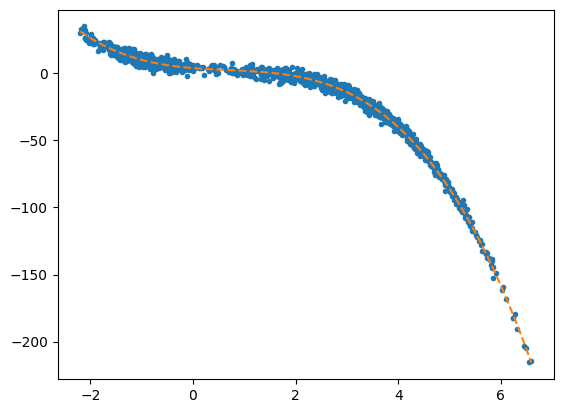

In [35]:
w = np.linalg.inv(x_reg.T @ x_reg) @ (x_reg.T @ y)
plt.plot(X[:, 1], y, ".")

x_linspace = np.linspace(np.min(x1), np.max(x1), 100)
# plt.plot(x_linspace, w[0] + w[1] * x_linspace + w[2] * x_linspace**2)
plt.plot(
    x_linspace, w[0] + w[1] * x_linspace + w[2] * x_linspace**2 + w[3] * x_linspace**3, "--"
)

Note:
It might seem unecessary to compute w, given that I already know y, and I'm using it in the formula. However the expression of y is actually unknown, writing y as a function of x is just a way to express the problem. In reality, we only have the data points, and we need to find the best w that fits the data.